In [38]:
from parser.dataset import create_subset
import pandas as pd
import librosa

import os
import re

Пример парсинга плейлиста со музыкальными свойствами

In [6]:
create_subset(["background jazz music"], "background", count=10)

{'title': 'Background for New Years Resolutions', 'artists': ['Instrumental Soft Jazz'], 'album': 'Happy Music for Remote Work - Big Band with Vibraphone', 'popularity': 0, 'camelot': '2A', 'BPM': 119.0, 'key': 'E♭ Minor', 'acousticness': 0.861, 'happiness': 0.637, 'instrumentalness': 0.182, 'liveness': 0.102, 'loudness': -13.157, 'danceability': 0.765, 'energy': 0.268}


,title,artists,album,popularity,camelot,BPM,key,acousticness,happiness,instrumentalness,liveness,loudness,danceability,energy,yt_id
0,Background for New Years Resolutions,[Instrumental Soft Jazz],Happy Music for Remote Work - Big Band with Vi...,0,2A,119.0,E♭ Minor,0.861,0.637,0.182,0.1020,-13.157,0.765,0.2680,66823129
1,Jazz Duo - Background for Working Remotely,[Soft Jazz Background Music],Soundscape for Siestas,0,8B,130.0,C Major,0.973,0.806,0.122,0.1260,-12.567,0.814,0.1830,66823128
2,Nu Jazz - Background Music for After Dinner Co...,[Coffee Shop Jazz Relax],Soundscapes for Afternoon Coffee,0,4A,111.0,F Minor,0.370,0.742,0.831,0.1880,-14.849,0.767,0.4470,66823123
3,Suave Music for Java Moments,[Smooth Jazz New York],Guitar Chill Out - Background Music for Mornin...,2,6B,88.0,B♭ Major,0.961,0.143,0.880,0.1040,-18.011,0.348,0.0383,66823121
4,Suave Atmosphere for All Night Study Sessions,[Lofi Background Music],Jazzhop Lofi - Ambiance for Depression,0,8A,91.0,A Minor,0.788,0.757,0.846,0.1030,-16.529,0.569,0.2790,69731331
5,Background Jazz,[Instrumental Music Cafe],Instrumental Coffee Jazz Moments,34,9A,80.0,E Minor,0.814,0.376,0.928,0.1120,-29.630,0.687,0.0509,66823127
6,Background Jazz for your New Home Office,[Coffeehouse Quartet],Working from Home - Background Jazz for your N...,28,6A,110.0,G Minor,0.785,0.756,0.867,0.0955,-26.460,0.778,0.1320,66823126
7,Vivacious Backdrops for Tribeca,[Manhattan Jazz Band],Music for Lower East Side (Vibraphone and Teno...,32,8A,72.0,A Minor,0.901,0.461,0.785,0.1050,-15.165,0.615,0.2160,66823113
8,NO Drums Jazz - Background Music for Ordering In,[Manhattan Steakhouse Music],Peaceful Vibes for Working Remotely,2,5A,129.0,C Minor,0.945,0.407,0.943,0.1120,-19.848,0.553,0.1520,66823119
9,Jazz Duo - Background for Telecommuting,[Manhattan Steakhouse Music],Peaceful Vibes for Working Remotely,4,8B,131.0,C Major,0.959,0.219,0.938,0.1120,-18.749,0.605,0.2040,66823117


Датасет в таком формате используется в проекте рекомендации песен для своего мероприятия или заведения. Подробнее можно смотреть [тут](https://github.com/MulhamShaheen/Data-collection-1)

# Аудио данные
Можно заметить поле `yt_id`, в нем сохранены идентификаторы песен на Яндекс.музыке, таким образом можем скачивать оттуда аудио файлы.

In [32]:
from parser.yandex import download_track

In [3]:
download_track(72668561, "songs/Riders On The Storm - Fredwreck Remix.mp3")

## Загрузка табличный датасет

In [7]:
upbeat_df = pd.read_csv("upbeat.csv")
sport_df = pd.read_csv("sport.csv")
background_df = pd.read_csv("background.csv")
dance_df = pd.read_csv("dance.csv")

In [8]:
upbeat_df.insert(2, "label", ["upbeat"]*10, True)
sport_df.insert(2, "label", ["sport"]*10, True)
background_df.insert(2, "label", ["background"]*10, True)
dance_df.insert(2, "label", ["dance"]*10, True)


In [12]:
songs_df = pd.concat([upbeat_df, sport_df, background_df, dance_df])

In [17]:
songs_df = songs_df.drop(["Unnamed: 0"], axis=1)

In [18]:
songs_df

,title,label,artists,album,popularity,camelot,BPM,key,acousticness,happiness,instrumentalness,liveness,loudness,danceability,energy,yt_id
0,Capitão de Areia,upbeat,['Afterclapp'],Capitão De Areia,46,8B,85.0,C Major,0.757000,0.308,0.077800,0.2530,-12.196,0.698,0.3370,53101044
1,Crystal Dolphin,upbeat,['Engelwood'],Crust FM,59,11B,128.0,A Major,0.330000,0.247,0.000445,0.4100,-6.868,0.558,0.7760,38410510
2,Where Is The Love?,upbeat,['Black Eyed Peas'],Elephunk,82,7B,94.0,F Major,0.111000,0.809,0.000000,0.1310,-3.222,0.834,0.6990,71235
3,Take It Easy,upbeat,['Batu Boris'],Take It Easy,34,9B,140.0,G Major,0.714000,0.735,0.014100,0.1030,-8.888,0.871,0.4680,86510748
4,My Witch,upbeat,['Moderator'],Sinner's Syndrome,46,7B,91.0,F Major,0.151000,0.532,0.234000,0.2950,-8.697,0.648,0.7710,40643189
5,Riders On The Storm - Fredwreck Remix,upbeat,"['Snoop Dogg', 'The Doors']",Riders On The Storm (Fredwreck Remix),66,10A,102.0,B Minor,0.416000,0.831,0.000031,0.1220,-5.273,0.878,0.7860,72668561
6,Imperial,upbeat,['j^p^n'],Prodigal,53,5B,102.0,E♭ Major,0.236000,0.397,0.085200,0.4830,-7.863,0.385,0.4540,83824389
7,They Dead Wrong,upbeat,"['Slivanoë', 'Tour De Manège']",Special East Coast,3,1A,90.0,A♭ Minor,0.100000,0.781,0.000046,0.1490,-4.922,0.808,0.7340,45821098
8,Believe Me (feat. Bobo & Styles of Beyond),upbeat,"['Fort Minor', 'Bobo', 'Styles Of Beyond']",The Rising Tied,46,4B,110.0,A♭ Major,0.064900,0.668,0.000444,0.3110,-3.406,0.702,0.9780,133052
9,Fantasy (feat. O.D.B.) - Bad Boy Fantasy,upbeat,"['Mariah Carey', ""Ol' Dirty Bastard""]",Fantasy EP,59,10A,102.0,B Minor,0.050100,0.804,0.000000,0.0409,-6.519,0.812,0.6610,4442566


In [36]:
for i, song in songs_df.iterrows():
    title = re.sub(r'[^\w_. -]', '_', song["title"])
    label = song["label"]
    yt_id = song["yt_id"]

    os.makedirs(f"songs/{label}", exist_ok=True)
    download_track(yt_id, f"songs/{label}/{title}.mp3")

    print(i, title)

0 Capitão de Areia
1 Crystal Dolphin
2 Where Is The Love_
3 Take It Easy
4 My Witch
5 Riders On The Storm - Fredwreck Remix
6 Imperial
7 They Dead Wrong
8 Believe Me _feat. Bobo _ Styles of Beyond_
9 Fantasy _feat. O.D.B._ - Bad Boy Fantasy
0 Willing to Party
1 Crazy Deja Vu
2 Dawn
3 Can_t Wait To Find Me
4 Party All Night
5 _pt 1_
6 Human Nature
7 Narkotik Kal
8 Музыка для бега
9 Trance Your Mind
0 Background for New Years Resolutions
1 Jazz Duo - Background for Working Remotely
2 Nu Jazz - Background Music for After Dinner Coffee
3 Suave Music for Java Moments
4 Suave Atmosphere for All Night Study Sessions
5 Background Jazz
6 Background Jazz for your New Home Office
7 Vivacious Backdrops for Tribeca
8 NO Drums Jazz - Background Music for Ordering In
9 Jazz Duo - Background for Telecommuting
0 Ghostchild _feat. Spree Wilson_
1 Hero _Satellite_ - Radio Edit
2 First
3 Lovestruck - Radio Edit
4 Wake Up - Radio Edit
5 TENGU
6 Booty Bounce - Extended Mix
7 Live Your Life - Radio Edit
8 Ze

### Mini EDA Аудио датасета

Читаем папки аудио файлов

In [43]:
song_dir = os.scandir("songs")
dur_dict = {}
for i, sub_set in enumerate(song_dir):
    if not os.path.isdir(sub_set.path):
        continue
    print(sub_set.name)
    dur_dict[sub_set.name] = {}
    label_dir = os.scandir(sub_set.path)
    for j, song in enumerate(label_dir):
        print("---", song.name)
        dur = librosa.get_duration(filename=song.path)
        dur_dict[sub_set.name][song.name] = dur

background
--- Background for New Years Resolutions.mp3
--- Background Jazz for your New Home Office.mp3
--- Background Jazz.mp3
--- Jazz Duo - Background for Telecommuting.mp3
--- Jazz Duo - Background for Working Remotely.mp3
--- NO Drums Jazz - Background Music for Ordering In.mp3
--- Nu Jazz - Background Music for After Dinner Coffee.mp3
--- Suave Atmosphere for All Night Study Sessions.mp3
--- Suave Music for Java Moments.mp3
--- Vivacious Backdrops for Tribeca.mp3
dance
--- Booty Bounce - Extended Mix.mp3
--- First.mp3
--- Ghostchild _feat. Spree Wilson_.mp3
--- Hero _Satellite_ - Radio Edit.mp3
--- Live Your Life - Radio Edit.mp3
--- Lovestruck - Radio Edit.mp3


C:\Users\user\AppData\Local\Temp\ipykernel_8224\1372107231.py:11: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  dur = librosa.get_duration(filename=song.path)


--- TENGU.mp3
--- Throw Your Hearts Up - Radio Edit.mp3
--- Wake Up - Radio Edit.mp3
--- Zero Gravity _feat. Lights_ - Radio Edit.mp3
sport
--- Can_t Wait To Find Me.mp3
--- Crazy Deja Vu.mp3
--- Dawn.mp3
--- Human Nature.mp3
--- Narkotik Kal.mp3
--- Party All Night.mp3
--- Trance Your Mind.mp3
--- Willing to Party.mp3
--- _pt 1_.mp3
--- Музыка для бега.mp3
upbeat
--- Believe Me _feat. Bobo _ Styles of Beyond_.mp3
--- Capitão de Areia.mp3
--- Crystal Dolphin.mp3
--- Fantasy _feat. O.D.B._ - Bad Boy Fantasy.mp3
--- Imperial.mp3
--- My Witch.mp3
--- Riders On The Storm - Fredwreck Remix.mp3
--- Take It Easy.mp3
--- They Dead Wrong.mp3
--- Where Is The Love_.mp3


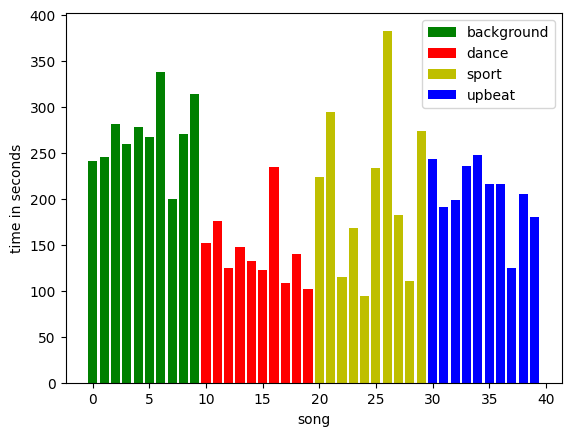

In [51]:
import matplotlib.pyplot as plt

plt.bar(range(10), dur_dict["dance"].values(), color='g')
plt.bar(range(10,20), dur_dict["sport"].values(), color='r')
plt.bar(range(20,30), dur_dict["upbeat"].values(), color='y')
plt.bar(range(30,40), dur_dict["background"].values(), color='b')
plt.legend(dur_dict.keys())
plt.xlabel("song")
plt.ylabel("time in seconds")
plt.show()

### Применение аудио данных

В многих рекомендательных системах используется encoding контента, и применение embedding песен. Можно взять спектрограмму песен, или из неё сделать вектор, и помимо табличных данных использовать в качестве входных данных модели рекомендаций

# Текстовые данные
Также по API Яндекс Музыки можем получить текст песен

In [52]:
from parser.yandex import get_lyrics

lyrics = []

for i, song in songs_df.iterrows():
    title = re.sub(r'[^\w_. -]', '_', song["title"])
    label = song["label"]
    yt_id = song["yt_id"]

    text = get_lyrics(yt_id)
    lyrics.append(text)

    print(i, title)

0 Capitão de Areia
1 Crystal Dolphin
2 Where Is The Love_
3 Take It Easy
4 My Witch
5 Riders On The Storm - Fredwreck Remix
Текст песни отсутствует
6 Imperial
Текст песни отсутствует
7 They Dead Wrong
8 Believe Me _feat. Bobo _ Styles of Beyond_
9 Fantasy _feat. O.D.B._ - Bad Boy Fantasy
Текст песни отсутствует
0 Willing to Party
Текст песни отсутствует
1 Crazy Deja Vu
Текст песни отсутствует
2 Dawn
Текст песни отсутствует
3 Can_t Wait To Find Me
Текст песни отсутствует
4 Party All Night
Текст песни отсутствует
5 _pt 1_
Текст песни отсутствует
6 Human Nature
Текст песни отсутствует
7 Narkotik Kal
Текст песни отсутствует
8 Музыка для бега
Текст песни отсутствует
9 Trance Your Mind
Текст песни отсутствует
0 Background for New Years Resolutions
Текст песни отсутствует
1 Jazz Duo - Background for Working Remotely
Текст песни отсутствует
2 Nu Jazz - Background Music for After Dinner Coffee
Текст песни отсутствует
3 Suave Music for Java Moments
Текст песни отсутствует
4 Suave Atmosphere for 

In [61]:
songs_lyrics_df = songs_df[["title", "album", "artists", "label"]]
songs_lyrics_df.head()

,title,album,artists,label
0,Capitão de Areia,Capitão De Areia,['Afterclapp'],upbeat
1,Crystal Dolphin,Crust FM,['Engelwood'],upbeat
2,Where Is The Love?,Elephunk,['Black Eyed Peas'],upbeat
3,Take It Easy,Take It Easy,['Batu Boris'],upbeat
4,My Witch,Sinner's Syndrome,['Moderator'],upbeat


In [62]:
songs_lyrics_df.insert(2, "lyrics", lyrics, True)
songs_lyrics_df.head(40)

,title,album,lyrics,artists,label
0,Capitão de Areia,Capitão De Areia,Garoto abandonado na Bahia é capitão de areia\...,['Afterclapp'],upbeat
1,Crystal Dolphin,Crust FM,"Hora Dolphin\nHora Dolphan\nHora Dolphin, Dolp...",['Engelwood'],upbeat
2,Where Is The Love?,Elephunk,"What's wrong with the world, mama?\nPeople liv...",['Black Eyed Peas'],upbeat
3,Take It Easy,Take It Easy,And I was going back and forth\nBefore I made ...,['Batu Boris'],upbeat
4,My Witch,Sinner's Syndrome,"Loveable, she's good and bad\nMess around and ...",['Moderator'],upbeat
5,Riders On The Storm - Fredwreck Remix,Riders On The Storm (Fredwreck Remix),Hey yo Jim man\nWhy don't ya\nYou don't you ki...,"['Snoop Dogg', 'The Doors']",upbeat
6,Imperial,Prodigal,None,['j^p^n'],upbeat
7,They Dead Wrong,Special East Coast,None,"['Slivanoë', 'Tour De Manège']",upbeat
8,Believe Me (feat. Bobo & Styles of Beyond),The Rising Tied,I guess that this is where we've come to\nIf y...,"['Fort Minor', 'Bobo', 'Styles Of Beyond']",upbeat
9,Fantasy (feat. O.D.B.) - Bad Boy Fantasy,Fantasy EP,"Yeah\nKeepin' it real, son\nOooooooh\nThat's r...","['Mariah Carey', ""Ol' Dirty Bastard""]",upbeat


In [59]:
songs_lyrics_df["lyrics"].isna().sum()

30

Можно заметить что не во всех классах присутствует текст в песнях. Возможно если наш юзкейс — подобрать песни для мероприятия, например "музыка про выпускной" то датасет с текстом песен был бы более актуален. В [проекте](https://github.com/MulhamShaheen/AI-DJ) работаем с embedding токенизированного текста.